# Read processed song data from pkl file

In [29]:
import pickle
import os

RESULTS_FILE = 'audio_features.pkl'

if os.path.exists(RESULTS_FILE):

    with open(RESULTS_FILE, 'rb') as pkl_file:
        saved_data = pickle.load(pkl_file)

    X = saved_data.get('X', [])
    y = saved_data.get('y_labels', [])
    processed_files = set(saved_data.get('processed_files', []))
    print(f"Loaded {len(processed_files)} processed tracks")


Loaded 127563 processed tracks


# Prepare X for further Processing

### Turn X into nparray
### Remove values where label is None

In [30]:
import numpy as np

X = np.array(X)
print("shape of feature matrix X: ", X.shape)

X = X[np.array(y) != None]
y = np.array(y)[np.array(y) != None]
print("shape of feature matrix X after removing None labels: ", X.shape)
print("shape of label vector y after removing None labels: ", y.shape)

shape of feature matrix X:  (129423, 55)
shape of feature matrix X after removing None labels:  (120951, 55)
shape of label vector y after removing None labels:  (120951,)


# Preprocess

### Re-label 'hip-hop' as 'hip hop'

In [31]:
genre_mapping = {
    'hip-hop': 'hip hop'
}

y = np.array([genre_mapping.get(label, label) for label in y])

# Remap genres

## Run this to define what genres the model should be trained for

In [32]:
popular_genres = {
    'country', 'metal', 'heavy-metal', 'hardstyle',
    'blues', 'rap', 'hip hop', 'classical', 'folk',
    'jazz', 'lo-fi', 'soul', 'punk', 'r&b', 'latin',
    'rock', 'rock-n-roll', 'techno', 'pop', 'house', 'phonk',
    'indie', 'idm', 'reggae', 'funk', 'acid',
    'death-metal', 'bluegrass', 'acoustic', 'electronic',
    'tango', 'forro', 'breakbeat', 'grindcore'
}


### Replace sub-genres with their parent genre based on regex from dict above

The two cells below are experimental and (I belive) lower the accuracy 

In [ ]:
### THIS OVERGENERALIZES THE LABELS AND ACCURACY BECOMES LOWER ###
import re

genre_patterns = [(genre, re.compile(rf'\b{re.escape(genre)}\b', re.IGNORECASE)) for genre in popular_genres]

def simplify_labels(y_labels):
    new_labels = []
    for label in y_labels:
        matched = False
        for genre, pattern in genre_patterns:
            if pattern.search(label):
                new_labels.append(genre)
                matched = True
                break
        if not matched:
            new_labels.append(label)
    return new_labels

y = simplify_labels(y)

In [ ]:
### OLD HAND WRITTEN CODE FOR MAPPING GENRES ###
genre_mapping = {
    'lo-fi beats': 'lo-fi',
    'chillwave': 'lo-fi',

    'nu metal': 'metal',
    'folk metal': 'metal',
    'heavy metal': 'metal',
    'metalcore': 'metal',
    'power metal': 'metal',
    'industrial metal': 'metal',
    'glam metal': 'metal',
    'melodic death metal': 'metal',
    'progressive metal': 'metal',
    'thrash metal': 'metal',
    'gothic metal': 'metal',
    'groove metal': 'metal',
    'death metal': 'metal',
    'alternative metal': 'metal',
    'black metal': 'metal',
    'speed metal': 'metal',

    'acid house': 'acid',
    'acid techno': 'acid',

    'afrobeat': 'afro',
    'afropop': 'afro',

    'art rock': 'rock',

    'britpop': 'alternative rock',
    
    'art pop': 'pop',
    'acoustic pop': 'pop',
    'bedroom pop': 'pop',
    'soft pop': 'pop', 
    'folk pop': 'pop',
    'norwegian pop': 'pop',
    'acoustic pop': 'pop',
    'dream pop': 'pop',
    'chamber pop': 'pop',
    'german pop': 'pop',
    'bedroom pop': 'pop',
    'city pop': 'pop',
    'dance pop': 'pop',
    'art pop': 'pop',
    'indie pop': 'pop',

    'alt country': 'country',
    'traditional country': 'country',

    'blues rock': 'blues',

    'brooklyn drill': 'drill',

    'gangster rap': 'rap',
    'memphis rap': 'rap',
    'rock rap': 'rap',
    'meme rap': 'rap',
    'punk rap': 'rap',
    'emo rap': 'rap',
    'jazz rap': 'rap',
    'melodic rap': 'rap',
    'cloud rap': 'rap',
    'k-rap': 'rap',
    'rage rap': 'rap',

    'edm trap': 'trap',
    'italian trap': 'trap',
    'dark trap': 'trap',

    'hip-hop': 'hip hop',
    'southern hip hop': 'hip hop',
    'west coast hip hop': 'hip hop',
    'east coast hip hop': 'hip hop',
    'finnish hip hop': 'hip hop',
    'german hip hop': 'hip hop',
    'underground hip hop': 'hip hop',
    'norwegian hip hop': 'hip hop',
    'experimental hip hop': 'hip hop',
    'alternative hip hop': 'hip hop',
    'latin hip hop': 'hip hop',

    'jazz blues': 'jazz',
    'vocal jazz': 'jazz',
    'french jazz': 'jazz',
    'free jazz': 'jazz',
    'soul jazz': 'jazz',
    'jazz fusion': 'jazz',
    'nu jazz': 'jazz',
    'jazz funk': 'jazz',
    'cool jazz': 'jazz',
    'jazz beats': 'jazz',
    'jazz house': 'jazz',
    'indie jazz': 'jazz',
    'smooth jazz': 'jazz',

    'melodic techno': 'techno',
    'minimal techno': 'techno',
    'hypertechno': 'techno',
    'hard techno': 'techno',
    'hardcore techno': 'techno',
    'dub techno': 'techno',

    'future house': 'house',
    'tech house': 'house',
    'bass house': 'house',
    'electro house': 'house',
    'tropical house': 'house',
    'french house': 'house',
    'melodic house': 'house',
    'organic house': 'house',
    'progressive house': 'house',
    'latin house': 'house',
    'deep house': 'house',
    'slap house': 'house',
    'chicago house': 'house'
    
} 

y = np.array([genre_mapping.get(label, label) for label in y])


## Remove duplicate entries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Detect and remove exact duplicate rows
# np.unique with return_index gives us the first occurrence
unique_rows, unique_indices = np.unique(X, axis=0, return_index=True)
n_duplicates = X.shape[0] - unique_indices.size
print(f"\nFound {n_duplicates} duplicate rows; removing them.")

X = X[unique_indices]
y = y[unique_indices]



Found 9325 duplicate rows; removing them.


### Extra: Keep only a popular type of genre

Filtered dataset size: 31748 entries (from 111626 original)


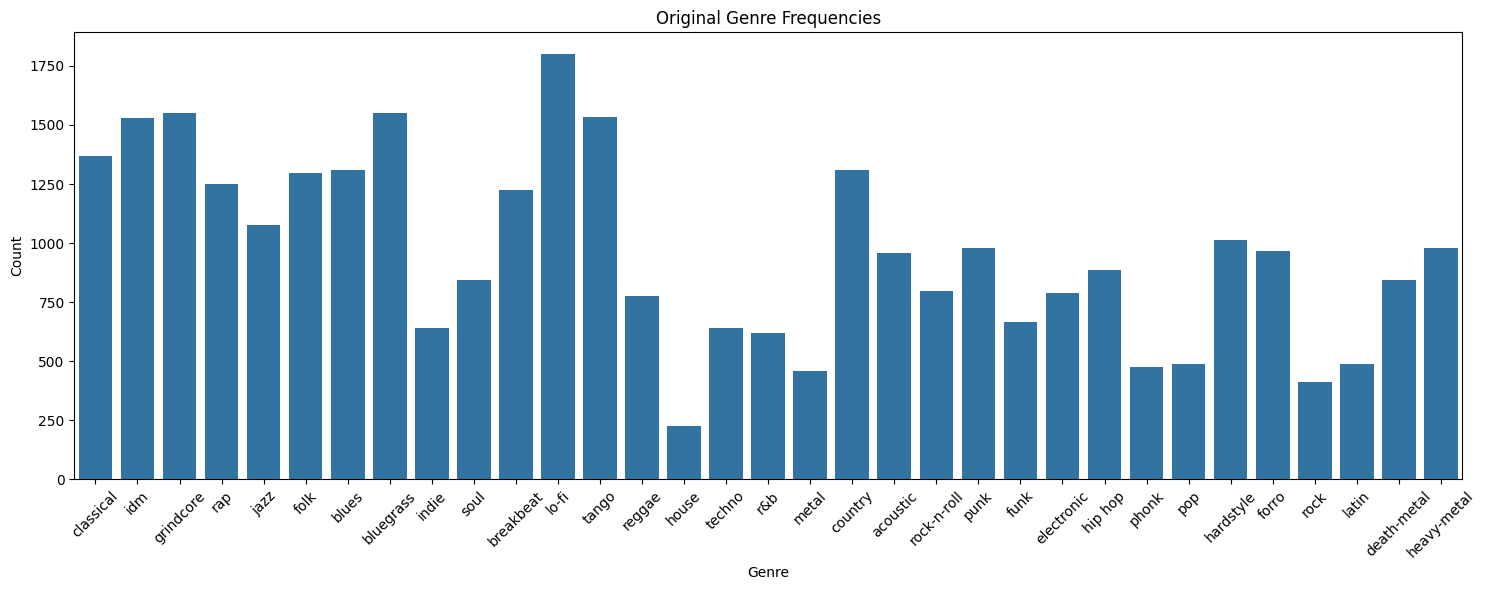

In [34]:
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Save the original labels for comparison
original_labels_list = y

# Create a mask of only the popular genres and apply to X and y
y_lower = np.array([genre.lower() for genre in y])
mask = np.array([genre in popular_genres for genre in y_lower])

# Apply the mask to X and y
X = X[mask]
y = y[mask]
print(f"Filtered dataset size: {len(y)} entries (from {len(original_labels_list)} original)")

# Count the frequency of each label in the filtered dataset
freq_original = Counter(y)

orig_genres = list(freq_original.keys())
orig_counts = list(freq_original.values())

fig, axs = plt.subplots(figsize=(15, 6))
sns.barplot(x=orig_genres, y=orig_counts, ax=axs)
axs.set_title("Original Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# Remove all songs with genres which do not come up more than n times

Class counts: Counter({'lo-fi': 1802, 'bluegrass': 1552, 'grindcore': 1549, 'tango': 1535, 'idm': 1528, 'classical': 1368, 'blues': 1308, 'country': 1308, 'folk': 1297, 'rap': 1249, 'breakbeat': 1224, 'jazz': 1076, 'hardstyle': 1015, 'punk': 981, 'heavy-metal': 978, 'forro': 966, 'acoustic': 959, 'hip hop': 885, 'soul': 843, 'death-metal': 843, 'rock-n-roll': 798, 'electronic': 789, 'reggae': 778, 'funk': 667, 'indie': 642, 'techno': 639, 'r&b': 618, 'latin': 490, 'pop': 487, 'phonk': 477, 'metal': 457, 'rock': 413, 'house': 227})


/var/folders/tw/gzw65vw15ql_zpmdm1w5fswh0000gn/T/ipykernel_12282/472678871.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(le.classes_)


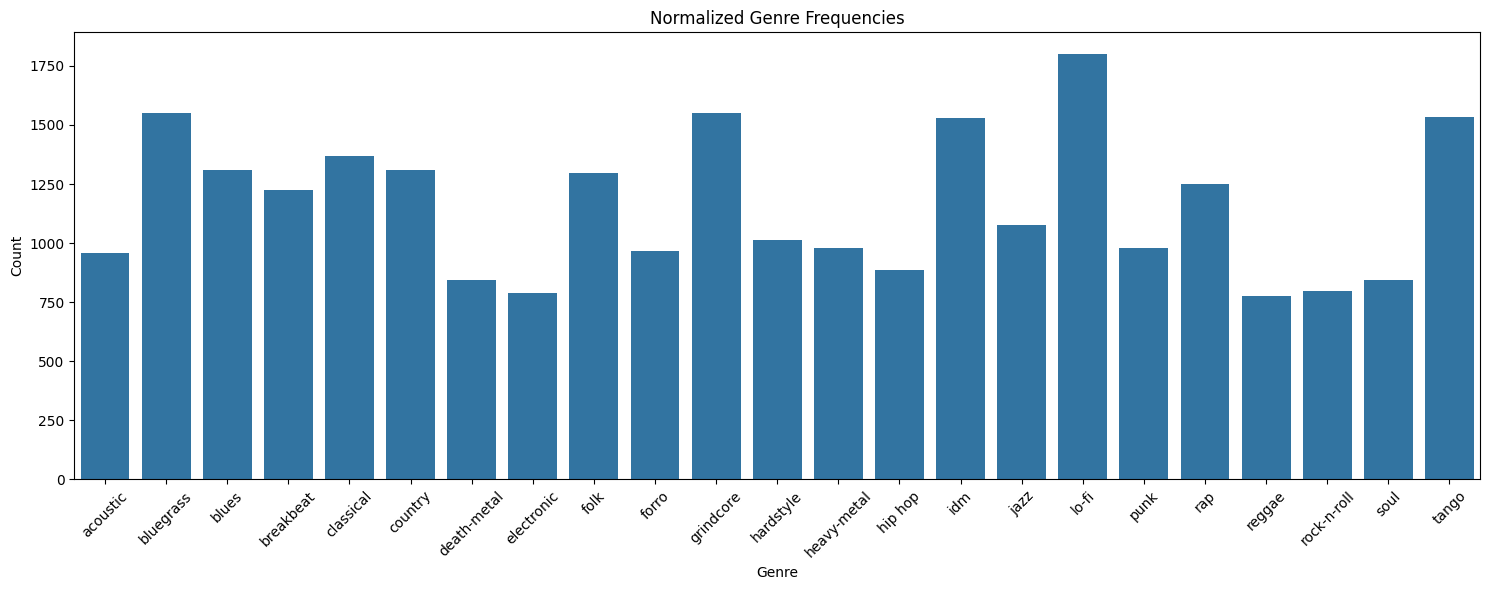

In [35]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# --- Encoding/Standardizing X ---
# Remove compex object variables
if np.iscomplexobj(X):
    X = np.abs(X)

# --- Counting Labels ---
# Check class counts.
counter = Counter(y)
print("Class counts:", counter)

# Keep only classes with at least n samples.
n = 700

classes_to_keep = {cls for cls, count in counter.items() if count >= n}
indices_to_keep = [i for i, label in enumerate(y) if label in classes_to_keep]

# Filter the data.
X_filtered = X[indices_to_keep]
y_filtered = y[indices_to_keep]

# Encode the Genres into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

freq_leftover = Counter(y_encoded)
leftover_genres = list(freq_leftover.keys())
leftover_counts = list(freq_leftover.values())

# Plot the frequencies of the genres
fig, axs = plt.subplots(figsize=(15, 6))
sns.barplot(x=leftover_genres, y=leftover_counts, ax=axs)
axs.set_title("Normalized Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)
axs.set_xticklabels(le.classes_)
plt.tight_layout()
plt.show()


# Remove highly collerating data

Dropping columns: ['feature_5', 'feature_8', 'feature_9', 'feature_10', 'feature_12', 'feature_14', 'feature_16', 'feature_20', 'feature_21', 'feature_23', 'feature_25', 'feature_26', 'feature_30', 'feature_31', 'feature_32', 'feature_34', 'feature_37', 'feature_38', 'feature_41', 'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_51', 'feature_53']


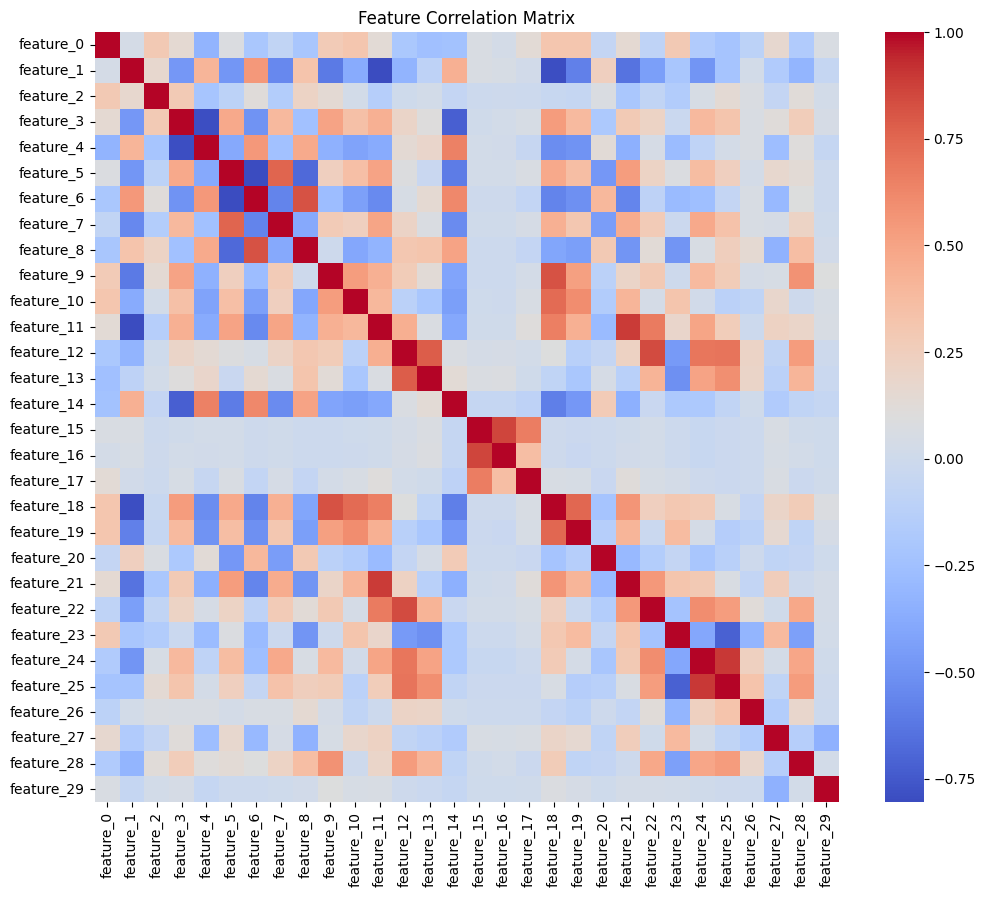

In [36]:
import pandas as pd
import numpy as np

CORRELATING_VALUE = 0.90

X = X_filtered

def remove_highly_correlated_features(X, threshold):
    # If X is a NumPy array, convert it to a DataFrame.
    if isinstance(X, np.ndarray):
        # Create column names if not provided
        X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
    else:
        X_df = X.copy()
    
    # Compute the absolute correlation matrix
    corr_matrix = X_df.corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify columns to drop: any feature with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("Dropping columns:", to_drop)
    
    # Drop these columns from the dataframe
    X_df_reduced = X_df.drop(columns=to_drop)
    
    # If original X was a NumPy array, return as a NumPy array.
    if isinstance(X, np.ndarray):
        return X_df_reduced.values
    else:
        return X_df_reduced


X_reduced = remove_highly_correlated_features(X, threshold=CORRELATING_VALUE)

# -- Create a feature correlation matrix --
df_features = pd.DataFrame(X_reduced, columns=[f'feature_{i}' for i in range(X_reduced.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

X_filtered = X_reduced


# Create a Test-Train split

In [ ]:
### UNBALANCED - USE BELOW FOR BALANCED DATASET ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

def balanced_train_test_split(X, y, test_size=0.2, random_state=None):
    # 1) figure out how many we have of each class
    classes, counts = np.unique(y, return_counts=True)
    min_count = counts.min()

    # 2) for each class, pick exactly min_count indices
    rng = np.random.RandomState(random_state)
    selected = []
    for cls in classes:
        idx = np.where(y == cls)[0]
        chosen = rng.choice(idx, size=min_count, replace=False)
        selected.append(chosen)
    selected = np.concatenate(selected)

    # 3) split *those* selected indices
    train_idx, test_idx = train_test_split(
        selected,
        test_size=test_size,
        random_state=random_state,
        shuffle=True,
        stratify=y[selected]  # this will now produce equal counts in each split
    )

    return (X[train_idx], X[test_idx], y[train_idx], y[test_idx])


X_train, X_test, y_train, y_test = balanced_train_test_split(
    X_filtered, y_encoded,
    test_size=0.2,
    random_state=42
)


## Impute X to avoid missing features

In [38]:
from sklearn.impute import SimpleImputer

# 2) Fit imputer on TRAIN only
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)

# 3) Apply the same imputer to TEST
X_test  = imputer.transform(X_test)


## Scale the splited data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # learns mean/std from TRAIN
X_test  = scaler.transform(X_test)       # applies TRAIN stats to TEST

print("Training set shapes:", X_train.shape, y_train.shape)
print("Test     set shapes:", X_test.shape,  y_test.shape)


Training set shapes: (14315, 30) (14315,)
Test     set shapes: (3579, 30) (3579,)


# Hyperparameter tuning

### Sequential ANN

In [41]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

EPOCHS = 60

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

def build_model(hp):
    model = models.Sequential()
    
    # First layer: Let tuner choose activation function and number of units.
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])
    units_1 = hp.Int('units_1', min_value=32, max_value=126, step=16)
    #units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32) # Very Big Model
    model.add(layers.Dense(units_1, activation=activation_1, input_shape=(num_features,),
                           kernel_regularizer=regularizers.l2(0.001)))
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    # Optional second layer: conditionally add if chosen by the tuner
    if hp.Boolean("second_layer"):
        activation_2 = hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
        units_2 = hp.Int('units_2', min_value=16, max_value=126, step=16)
        #units_2 = hp.Int('units_2', min_value=32, max_value=256, step=32) # Very Big
        model.add(layers.Dense(units_2, activation=activation_2,
                               kernel_regularizer=regularizers.l2(0.001)))
        # Optional dropout after second layer
        dropout_rate_2 = hp.Float('dropout_rate_2', 0.0, 0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate_2))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Hyperparameter for learning rate
    lr = hp.Choice('learning_rate', values = [1e-4, 1e-3, 1e-2])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=150,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='activation_tuning'
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Start hyperparameter search
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,  # Increase epochs for a more robust search if time allows
    callbacks=[early_stop]
)

# Retrieve best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
print("Best Hyperparameters:")
print(best_hps.values)

# Train the best model further if needed
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    callbacks=[early_stop],
    #optimzer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")



/Users/agres/Projects/seb/predictify/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
sigmoid           |sigmoid           |activation_1
64                |64                |units_1
0.2               |0.2               |dropout_rate
True              |True              |second_layer
0.001             |0.001             |learning_rate

Epoch 1/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1081 - loss: 3.0360 - val_accuracy: 0.3113 - val_loss: 2.3159
Epoch 2/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2931 - loss: 2.2892 - val_accuracy: 0.3557 - val_loss: 2.1008
Epoch 3/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3331 - loss: 2.1466 - val_accuracy: 0.3752 - val_loss: 2.0381
Epoch 4/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.3474 - loss: 2.1067 - val_accuracy: 0.3873 - val_loss: 2.0031
Epoch 5/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.3555 - loss: 2.0748 - val_accuracy: 0.3937 - val_loss: 1.9812
Epoch 6/60
448/448 ━━━━━

KeyboardInterrupt: 

### K-Nearest-Neighbour

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform; total time=   5.3s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform; total time=   2.9s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform; total time=   2.7s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform; total time=   2.5s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=distance; total time=   3.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=uniform; total time=   2.8s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=distance; total time=   2.7s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=1, weights=distance; total time=   2.7s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=2, weights=uniform; tot

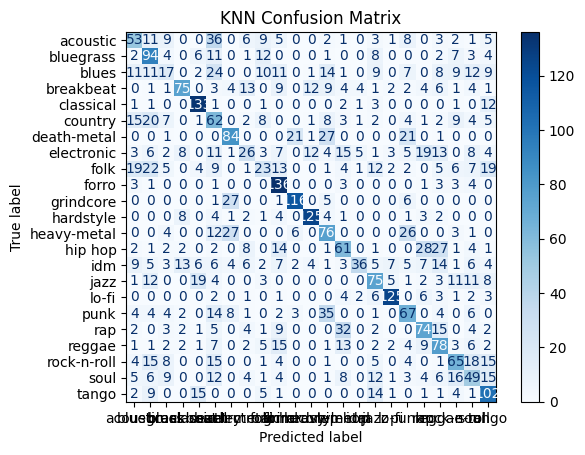

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_neighbors': list(range(1, 21, 2)),    # bias–variance trade-off
    'weights': ['uniform', 'distance'],         # equal vs. distance-based voting
    'p': [1, 2],                                # Manhattan vs. Euclidean
    'algorithm': ['auto'],
    'leaf_size': [10, 20, 30],              # affects speed of tree-based searches
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
    )
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Predict using best estimator
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate
print("Test accuracy: ", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()


Todos:

Remove Electronic from Features
Avoid Feature Tuning?
Gridsearch on XGradient Boost


### X-Gradient-Boost

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': [200, 500, 800, 1500, 2000],
    'learning_rate': uniform(0.001, 0.1),
    'max_depth': [3, 5, 7, 9],
    'gamma': uniform(0.5, 1),
    'min_child_weight': [3, 5, 7, 10, 13],
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.6, 0.4),
    'colsample_bylevel': uniform(0.6, 0.4),
    'colsample_bynode': uniform(0.6, 0.4),
    'reg_alpha': uniform(0.5, 1.0),
    'reg_lambda': uniform(1.0, 2.0),
    'early_stopping_rounds': [20]
}

xgb = XGBClassifier(eval_metric='mlogloss')
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=50, cv=5,
    scoring='accuracy', n_jobs=1, verbose=2, random_state=42
)
random_search.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
)

print("Best parameters found: ", random_search.best_params_)

# Predict with the best estimator
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Accuracy
print("Test accuracy: ", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.title("XGBoost Confusion Matrix")
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-mlogloss:3.05351
[1]	validation_0-mlogloss:3.01844
[2]	validation_0-mlogloss:2.98522
[3]	validation_0-mlogloss:2.95346
[4]	validation_0-mlogloss:2.92324
[5]	validation_0-mlogloss:2.89454
[6]	validation_0-mlogloss:2.86715
[7]	validation_0-mlogloss:2.84082
[8]	validation_0-mlogloss:2.81562
[9]	validation_0-mlogloss:2.79127
[10]	validation_0-mlogloss:2.76841
[11]	validation_0-mlogloss:2.74614
[12]	validation_0-mlogloss:2.72415
[13]	validation_0-mlogloss:2.70316
[14]	validation_0-mlogloss:2.68361
[15]	validation_0-mlogloss:2.66411
[16]	validation_0-mlogloss:2.64569
[17]	validation_0-mlogloss:2.62736
[18]	validation_0-mlogloss:2.60938
[19]	validation_0-mlogloss:2.59223
[20]	validation_0-mlogloss:2.57507
[21]	validation_0-mlogloss:2.55919
[22]	validation_0-mlogloss:2.54325
[23]	validation_0-mlogloss:2.52738
[24]	validation_0-mlogloss:2.51247
[25]	validation_0-mlogloss:2.49736
[26]	validation_0-mlogloss:2.48316
[27

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

'''
model_xgb = XGBClassifier(
    n_estimators = 250,
    learning_rate = 0.05, # 0.15
    max_depth = 7, # 7
    gamma = 0.13, # 0.13
    min_child_weight = 3, # 3
    subsample = 0.73,
    colsample_bytree = 0.99,
    random_state = 42,
    eval_metric=['mlogloss', 'merror'],
    early_stopping_rounds=15
    )
model_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)
'''

from xgboost import XGBClassifier

# 1. Grab the best params from your search
best_params = random_search.best_params_.copy()

# 2. Remove anything that shouldn't go in __init__ (like early_stopping_rounds)
best_params.pop('early_stopping_rounds', None)

# 3. Instantiate a new model with eval metrics baked in
best_model = XGBClassifier(
    **best_params,
    eval_metric=['mlogloss','merror'],
    random_state=42,
    early_stopping_rounds=20
)

# 4. Fit it manually with your train/test eval_set & early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

model_xgb = best_model

results = model_xgb.evals_result_
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(epochs)

# 4a. Plot logloss (lower is better)
plt.figure(figsize=(8,5))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train mlogloss')
plt.plot(x_axis, results['validation_1']['mlogloss'],  label='Test  mlogloss')
plt.xlabel('Boosting Round')
plt.ylabel('M-Logloss')
plt.title('Train vs. Test M-Logloss')
plt.legend()
plt.grid(True)
plt.show()

# 4b. Plot classification error (lower is better → accuracy = 1-error)
plt.figure(figsize=(8,5))
plt.plot(x_axis, results['validation_0']['merror'], label='Train merror')
plt.plot(x_axis, results['validation_1']['merror'],  label='Test  merror')
plt.xlabel('Boosting Round')
plt.ylabel('M-Error')
plt.title('Train vs. Test Classification M-Error')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Predictions
y_pred = model_xgb.predict(X_test)

# Use 'macro', 'micro', or 'weighted' depending on what you want:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=model_xgb.classes_))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature Importance
importances = model_xgb.feature_importances_
features = [f"Feature {i}" for i in range(X_train.shape[1])]
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

# Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model_xgb,
    X_train,
    y_train,
    cv=5,
    scoring=None,
    n_jobs=-1
    )
print("Cross-validated AUC scores:", scores)

# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_xgb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

import matplotlib.pyplot as plt
import numpy as np

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [None] + list(randint(5, 31).rvs(10).tolist()),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=5,           # try 60 different combinations
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)
rand_search.fit(X_train, y_train)

print("Best parameters found: ", rand_search.best_params_)

best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Accuracy and detailed report
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title("Random Forest Confusion Matrix")
plt.show()


# Evaluation Charts

## Confusion Matrix - Shows what was the predicted value compared to the true value when evaluating the Model

The more values in the diagonal line the better

In [ ]:
#BEST_MODEL = best_model # ANN
#BEST_MODEL = best_knn # KNN

#Confusion Matrix
# Get predictions on the test set.
y_pred = np.argmax(best_model.predict(X_test), axis=1)

decoded_y_test = le.inverse_transform(y_test)
decoded_y_pred = le.inverse_transform(y_pred)

# Create confusion matrix.
cm = confusion_matrix(decoded_y_test, decoded_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Loss and Accuracy Plots - Shows how the models loss and accuracy values changed during the training

The closer the lines to each other the better

In [ ]:
# Plot training vs. validation loss and accuracy.
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Feature Corrleation Matrix - How much the features correlate to each other 

Less correlating features is better

In [ ]:
df_features = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Feature permutation importance - shows how much each feature was important in making a decision in the model

Potential: remove the non-important features

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Wrapper for the Keras model to work with sklearn's permutation_importance.
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        # Model is already trained.
        return self
    
    def predict(self, X):
        preds = self.model.predict(X)
        return np.argmax(preds, axis=1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Wrap our trained model.
wrapper = KerasClassifierWrapper(best_model)

# Compute permutation importance on the test set.
result = permutation_importance(wrapper, X_test, y_test, n_repeats=10,
                                random_state=42, scoring='accuracy')
importance_means = result.importances_mean

# Plot the permutation importance.
plt.figure(figsize=(12, 6))
features = [f'feature_{i}' for i in range(X_filtered.shape[1])]
plt.bar(features, importance_means)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.show()


# Remove unimportant features

In [ ]:
import numpy as np
import pandas as pd

# Assume importance_means and importance_threshold are already defined
importance_threshold = 0.01  # adjust this threshold as needed

# Check if X_train is a DataFrame, if not, convert it and assign column names.
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
else:
    X_train_df = X_train.copy()

# Do the same for X_test.
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test.copy()

# Identify the indices of features with importance greater than or equal to the threshold.
important_feature_indices = np.where(importance_means >= importance_threshold)[0]
print("Important feature indices:", important_feature_indices)

# Retrieve the names of the important features.
important_features = X_train_df.columns[important_feature_indices]
print("Important features:", important_features.tolist())

# Filter the training and test DataFrames to keep only the important features.
X_train_reduced = X_train_df[important_features]
X_test_reduced = X_test_df[important_features]

print("Original training shape:", X_train_df.shape)
print("Reduced training shape:", X_train_reduced.shape)

# Re-run Hyperparameter search

In [ ]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined
num_features = X_train_reduced.shape[1]
num_classes = len(np.unique(y_train))

def build_model(hp):
    model = models.Sequential()
    
    # First layer: Let tuner choose activation function and number of units.
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])
    units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16)
    model.add(layers.Dense(units_1, activation=activation_1, input_shape=(num_features,),
                           kernel_regularizer=regularizers.l2(0.01)))
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    # Optional second layer: conditionally add if chosen by the tuner
    if hp.Boolean("second_layer"):
        activation_2 = hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
        units_2 = hp.Int('units_2', min_value=16, max_value=128, step=16)
        model.add(layers.Dense(units_2, activation=activation_2,
                               kernel_regularizer=regularizers.l2(0.01)))
        # Optional dropout after second layer
        dropout_rate_2 = hp.Float('dropout_rate_2', 0.0, 0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate_2))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Hyperparameter for learning rate
    lr = hp.Choice('learning_rate', values = [1e-4, 1e-3, 1e-2])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='activation_tuning'
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Start hyperparameter search
tuner.search(
    X_train_reduced, y_train,
    validation_data=(X_test_reduced, y_test),
    epochs=EPOCHS,  # Increase epochs for a more robust search if time allows
    callbacks=[early_stop]
)

# Retrieve best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
print("Best Hyperparameters:")
print(best_hps.values)

# Train the best model further if needed
history = best_model.fit(
    X_train_reduced, y_train,
    validation_data=(X_test_reduced, y_test),
    epochs=EPOCHS,  # Use best trial's epochs or default
    callbacks=[early_stop],
    #optimzer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test_reduced, y_test)
print(f"Test accuracy: {test_acc:.4f}")